Bussines Problem-
The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.



goal of project-
The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

So before staring the ML project, we need to import some required libraries.

In [126]:
import pandas as pd
import matplotlib.pyplot  as plt;
import seaborn as sns
from dateutil import parser
import numpy as np


In [127]:
fin_tech_appdata=pd.read_csv(r"FineTech_appData.csv")   # load data.

In [128]:
fin_tech_appdata.shape   # check the shape.


(50000, 12)

In [129]:
fin_tech_appdata.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1
5,56480,58:15.8,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,59:03.3,0


In [130]:
for i in [1,2,3,4,5]:
    print(fin_tech_appdata.loc[i,"screen_list"]) # screen list ki toatal value print

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2
Splash,Cycle,Loan
product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2
idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review
idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3


In [131]:
fin_tech_appdata.isnull().sum() # find null value


user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [132]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [133]:
fin_tech_appdata.describe()  # toatal value of described (kitna % kya use hua)

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
feature=fin_tech_appdata.columns # print the columnn
for i in feature:
    print("""uniqe value of{}\n,len value{}""".format(i,fin_tech_appdata[i].unique(),len(fin_tech_appdata[i].unique()))) # print finteck data app me all column ki  uniqe value

uniqe value ofuser
,len value[235136 333588 254414 ... 302367 324905  27047]
uniqe value offirst_open
,len value['14:51.3' '16:00.9' '19:09.2' ... '27:27.9' '34:40.1' '30:47.7']
uniqe value ofdayofweek
,len value[3 6 1 4 2 0 5]
uniqe value ofhour
,len value[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
uniqe value ofage
,len value[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  98]


uniqe value ofscreen_list
,len value['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'
 'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2'
 'Splash,Cycle,Loan' ...
 'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home'
 'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review'
 'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2']
uniqe value ofnumscree

In [9]:
fin_tech_appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
fin_tech_appdata['hour'] = fin_tech_appdata.hour.str.slice(1,3).astype(int) 
 # conveert string to int

In [299]:
fin_tech_appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [361]:
fin_tech_appdata.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [11]:
fin_tech_appdata2=fin_tech_appdata.drop(['user','first_open','screen_list','enrolled_date'],axis=1) # drop the column of fin_data_app

In [302]:
fin_tech_appdata2


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


data visualization

create heatmap

Text(0.5, 1.0, 'heatmap using corelation metrix of fin_tech_appdata2')

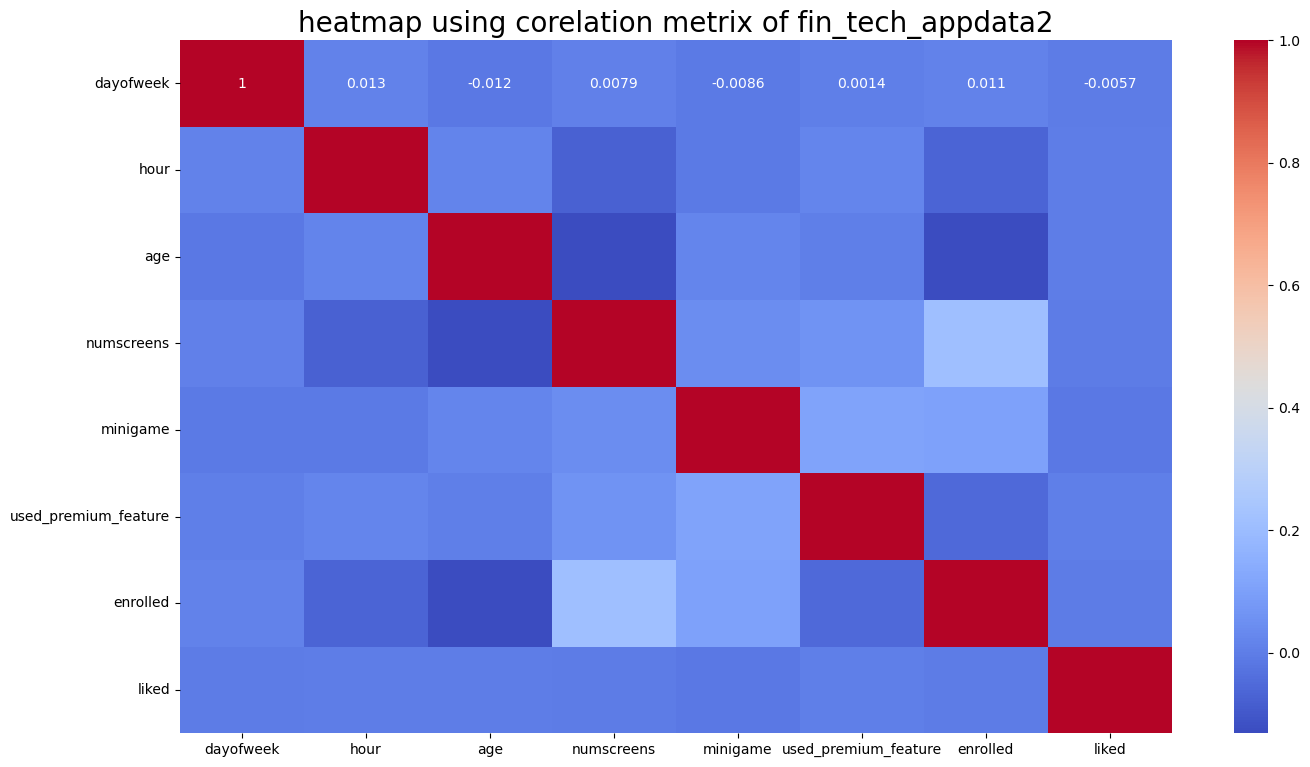

In [43]:
plt.figure(figsize=(16,9)) 
sns.heatmap(fin_tech_appdata2.corr(),annot=True,cmap='coolwarm')
plt.title('heatmap using corelation metrix of fin_tech_appdata2',fontsize=20)

pair plot 

countplot of enroll

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

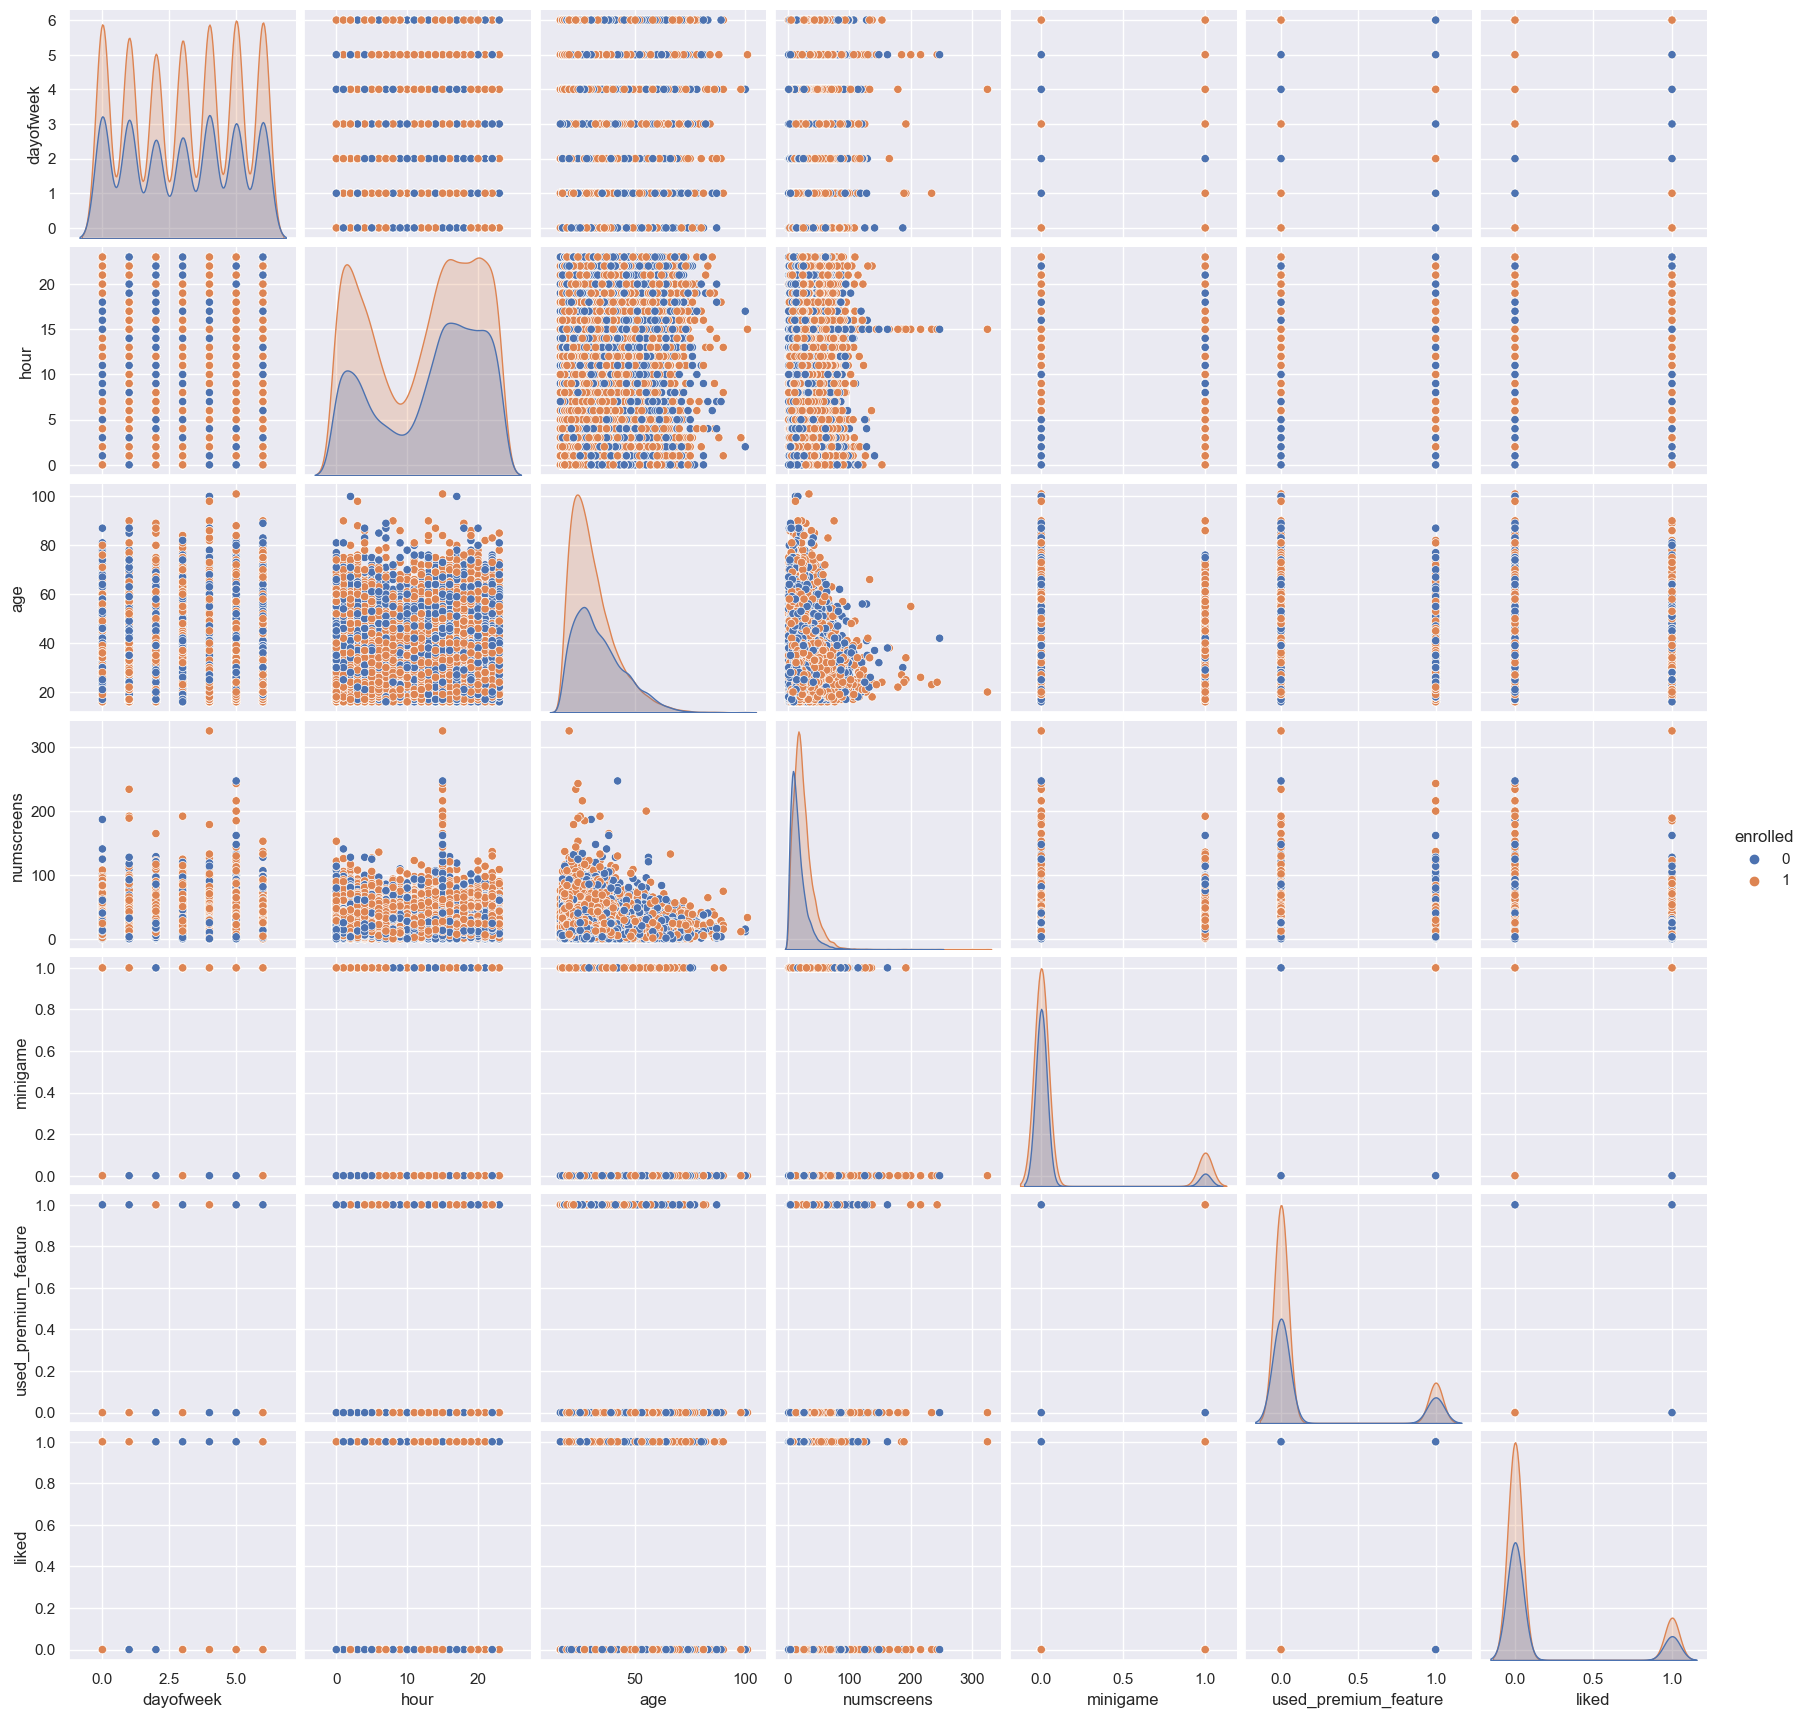

In [53]:
sns.pairplot(fin_tech_appdata2,hue='enrolled')

<Axes: ylabel='count'>

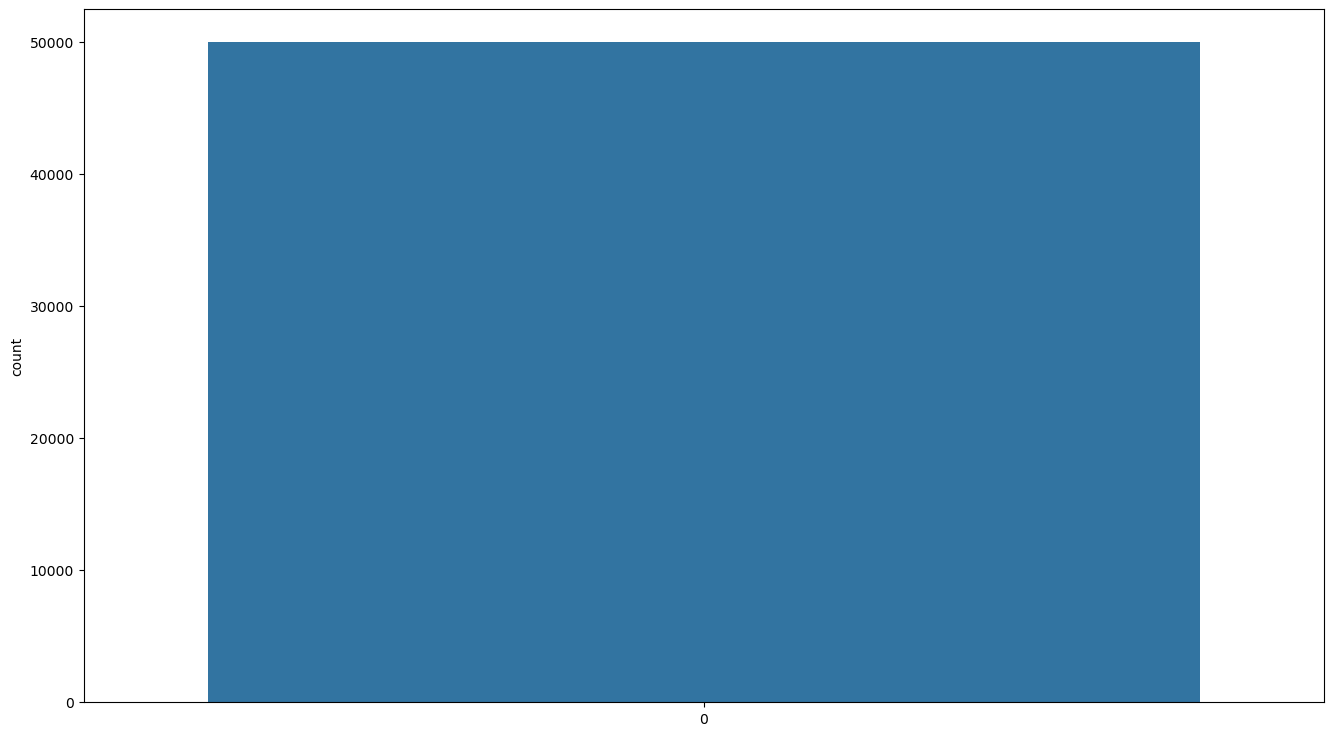

In [18]:
plt.figure(figsize=(16,9))
sns.countplot(fin_tech_appdata.enrolled)

In [214]:
# enrolled and not enrolled user 
print("not enrolled",(fin_tech_appdata.enrolled < 1).sum(), "out of 50000")
print("enrolled customer",50000-(fin_tech_appdata.enrolled < 1).sum(),"out of 500000")

not enrolled 18926 out of 50000
enrolled customer 31074 out of 500000


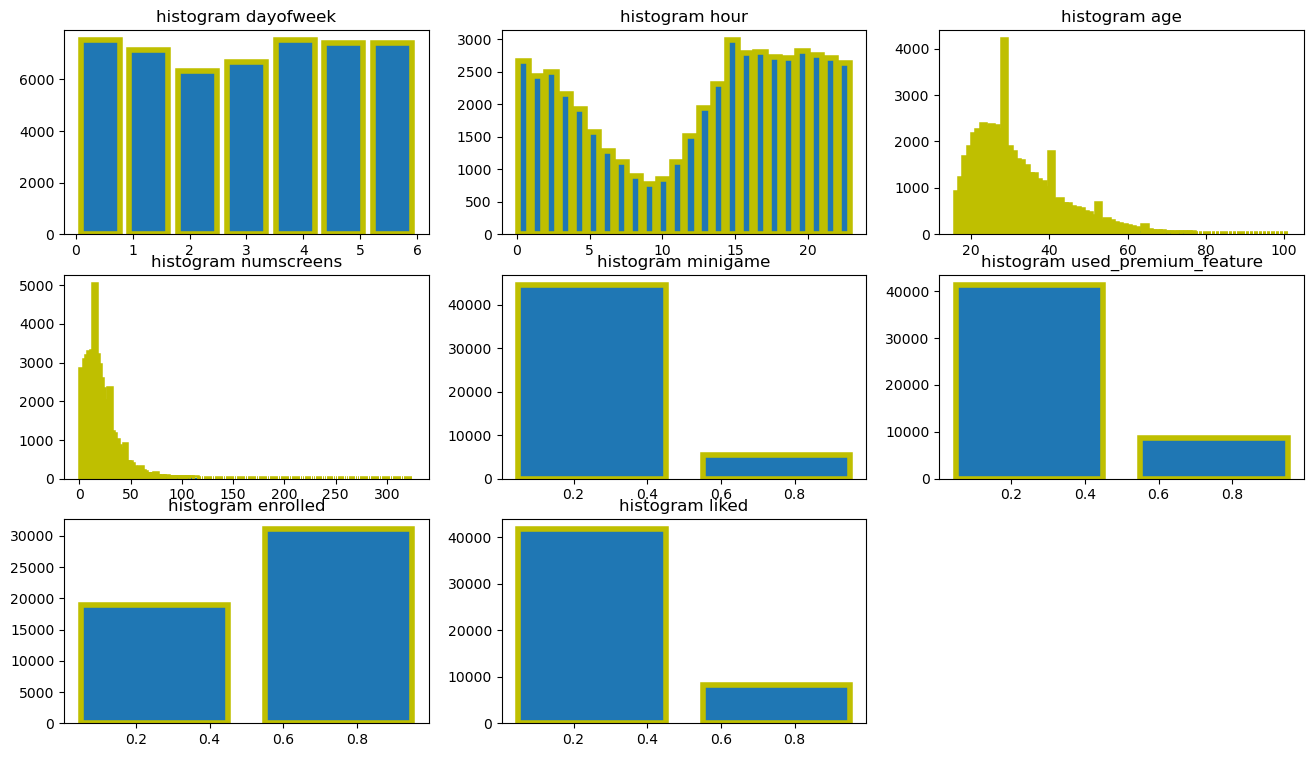

In [20]:
plt.figure(figsize=(16,9))
feature=fin_tech_appdata2.columns  # list of columns
for i,j in enumerate(feature):
    plt.subplot(3,3,i+1) # create a subplot
    plt.title("histogram {}".format(j),fontsize=12)  # page title
    bins=len(fin_tech_appdata2[j].unique())
    plt.hist(fin_tech_appdata2[j],bins=bins,rwidth=0.8,edgecolor='y',linewidth=4)


correlation barplot with enroll

In [215]:
fin_tech_appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
#convert object into parse date time
fin_tech_appdata['first_open'] = pd.to_datetime(fin_tech_appdata['first_open'], errors='coerce')

#fin_tech_appdata['first_open'] =[parser.parse(i) for i in fin_tech_appdata['first_open']]
 
#fin_tech_appdata['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fin_tech_appdata['enrolled_date']]
 
#fin_tech_appdata.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_10644\2791819572.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fin_tech_appdata['first_open'] = pd.to_datetime(fin_tech_appdata['first_open'], errors='coerce')


In [13]:
fin_tech_appdata['enrolled_date'] = pd.to_datetime(fin_tech_appdata['enrolled_date'], errors='coerce')


C:\Users\DELL\AppData\Local\Temp\ipykernel_10644\1132773097.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fin_tech_appdata['enrolled_date'] = pd.to_datetime(fin_tech_appdata['enrolled_date'], errors='coerce')


In [14]:
fin_tech_appdata.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
# enroll_date subtract first_open and set type in  hour
fin_tech_appdata["time_to_enrolled"]=(fin_tech_appdata.enrolled_date - fin_tech_appdata.first_open)

(array([18926.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 31074.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

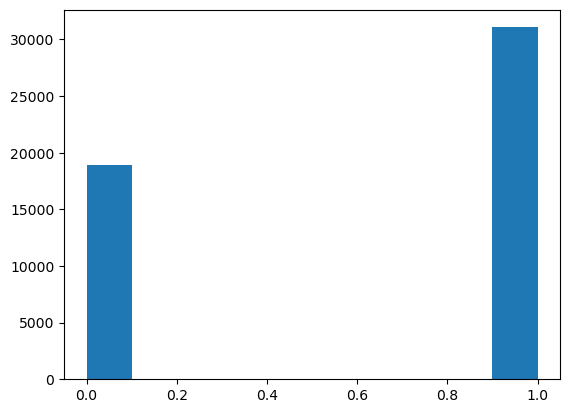

In [16]:
plt.hist(fin_tech_appdata["enrolled"]) #  shoow the histogram

In [17]:
fin_tech_appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2024-06-06 14:51:18,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT
1,333588,2024-06-06 16:00:54,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT
2,254414,2024-06-06 19:09:12,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT
3,234192,2024-06-06 08:46:24,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2024-06-06 11:49:30,0,0 days 03:03:06
4,51549,NaT,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,NaT,1,NaT


In [18]:
# remoove enrolled data,enrolled,first open
fin_tech_appdata.drop(columns=["first_open","enrolled_date","time_to_enrolled"],inplace=True)
fin_tech_appdata.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [19]:
#  top screen read csv file convert numpy array
fin_tech_appdata_top_screen=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Python_Test\top_screens.csv").top_screens.values

In [20]:
fin_tech_appdata_top_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [21]:
type(fin_tech_appdata_top_screen)

numpy.ndarray

In [22]:
#Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
fin_tech_appdata["screen_list"]=fin_tech_appdata.screen_list.astype(str)+','

In [23]:
for screen_name in fin_tech_appdata_top_screen:
    fin_tech_appdata[screen_name]=fin_tech_appdata.screen_list.str.contains(screen_name).astype(int)
    fin_tech_appdata["screen_list"]=fin_tech_appdata.screen_list.str.replace(screen_name+",","")


In [24]:
fin_tech_appdata.screen_list.str.contains('splash').astype(int)
# convert true and false value

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [25]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     50000 non-null  int64 
 1   dayofweek                50000 non-null  int64 
 2   hour                     50000 non-null  int32 
 3   age                      50000 non-null  int64 
 4   screen_list              50000 non-null  object
 5   numscreens               50000 non-null  int64 
 6   minigame                 50000 non-null  int64 
 7   used_premium_feature     50000 non-null  int64 
 8   enrolled                 50000 non-null  int64 
 9   liked                    50000 non-null  int64 
 10  Loan2                    50000 non-null  int32 
 11  location                 50000 non-null  int32 
 12  Institutions             50000 non-null  int32 
 13  Credit3Container         50000 non-null  int32 
 14  VerifyPhone              50000 non-nul

In [26]:
fin_tech_appdata.screen_list.str.replace("splash"+",","")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [27]:
fin_tech_appdata.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
fin_tech_appdata.shape

(50000, 68)

In [29]:
#remaian screen in screnn list
fin_tech_appdata.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [30]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     50000 non-null  int64 
 1   dayofweek                50000 non-null  int64 
 2   hour                     50000 non-null  int32 
 3   age                      50000 non-null  int64 
 4   screen_list              50000 non-null  object
 5   numscreens               50000 non-null  int64 
 6   minigame                 50000 non-null  int64 
 7   used_premium_feature     50000 non-null  int64 
 8   enrolled                 50000 non-null  int64 
 9   liked                    50000 non-null  int64 
 10  Loan2                    50000 non-null  int32 
 11  location                 50000 non-null  int32 
 12  Institutions             50000 non-null  int32 
 13  Credit3Container         50000 non-null  int32 
 14  VerifyPhone              50000 non-nul

In [31]:
fin_tech_appdata.screen_list.str.count(',').head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [32]:
# count remain screen list and store remain_screen_list
fin_tech_appdata["remain_screen_list"]=fin_tech_appdata.screen_list.str.count(",")

In [33]:
#remain scren list print
fin_tech_appdata['remain_screen_list'].head()

0     7
1     5
2     0
3     6
4    10
Name: remain_screen_list, dtype: int64

In [34]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     50000 non-null  int64 
 1   dayofweek                50000 non-null  int64 
 2   hour                     50000 non-null  int32 
 3   age                      50000 non-null  int64 
 4   screen_list              50000 non-null  object
 5   numscreens               50000 non-null  int64 
 6   minigame                 50000 non-null  int64 
 7   used_premium_feature     50000 non-null  int64 
 8   enrolled                 50000 non-null  int64 
 9   liked                    50000 non-null  int64 
 10  Loan2                    50000 non-null  int32 
 11  location                 50000 non-null  int32 
 12  Institutions             50000 non-null  int32 
 13  Credit3Container         50000 non-null  int32 
 14  VerifyPhone              50000 non-nul

In [35]:
fin_tech_appdata.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [36]:
#drop screen list
fin_tech_appdata.drop(columns=['screen_list'],axis=1,inplace=True)

In [37]:
fin_tech_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [38]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   Loan2                    50000 non-null  int32
 10  location                 50000 non-null  int32
 11  Institutions             50000 non-null  int32
 12  Credit3Container         50000 non-null  int32
 13  VerifyPhone              50000 non-null  int32
 14  BankVerification         50000 non-null  int32
 15  Ve

In [39]:
fin_tech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [40]:
#take of total sum of saving sreem
saving_feature=['Saving1',
                'Saving2',
                'Saving2Amount',
                'Saving4',
                'Saving5',
                'Saving6',
                'Saving7',
                'Saving8',
                'Saving9',
                'Saving10']
fin_tech_appdata['saving_screen_count']=fin_tech_appdata[saving_feature].sum(axis=1)
fin_tech_appdata.drop(columns=saving_feature,inplace=True)

In [41]:
fin_tech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


In [42]:
fin_tech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'remain_screen_list', 'saving_screen_count'],
      dtype='ob

In [43]:
#take sum off all credit_feature
creadit_feature=['Credit3Container',
                 'Credit3Dashboard',
                 'Credit3',
                 'Credit1',
                ]
fin_tech_appdata['creadit_features_count']=fin_tech_appdata[creadit_feature].sum(axis=1)
fin_tech_appdata.drop(columns=creadit_feature,axis=1,inplace=True)

In [44]:
fin_tech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,creadit_features_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,6,0,2
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,13,0,0


In [45]:
fin_tech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Loan3',
       'CC1Category', 'Splash', 'Loan', 'CC1', 'RewardsContainer',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'remain_screen_list', 'saving_screen_count', 'creadit_features_count'],
      dtype='object')

In [46]:
#take sum off all cc1 feature
cc1_feature=['CC1',
             'CC1Category',
             'CC3'
                ]
fin_tech_appdata['cc1_features_count']=fin_tech_appdata[cc1_feature].sum(axis=1)
fin_tech_appdata.drop(columns=cc1_feature,axis=1,inplace=True)

In [47]:
fin_tech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,creadit_features_count,cc1_features_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,2,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,13,0,0,0


In [48]:
fin_tech_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Loan3', 'Splash',
       'Loan', 'RewardsContainer', 'EditProfile', 'Credit2', 'Finances',
       'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendToken', 'TransactionList',
       'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screen_count', 'creadit_features_count', 'cc1_features_count'],
      dtype='object')

In [49]:
loan_feature=['Loan',
              'Loan2',
              'Loan3',
              'Loan4',
             ]
fin_tech_appdata['loan_features_count']=fin_tech_appdata[loan_feature].sum(axis=1)
fin_tech_appdata.drop(columns=loan_feature,axis=1,inplace=True)

In [50]:
fin_tech_appdata

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,creadit_features_count,cc1_features_count,loan_features_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,2,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [336]:
fin_tech_appdata.shape

(50000, 54)

In [51]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [411]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [337]:
fin_tech_appdata.describe()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screen_count,creadit_features_count,cc1_features_count,loan_features_count
count,50000.000000,20227,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,12974,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,2024-06-05 11:42:01.943243776,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,2024-06-05 11:56:06.566979840,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.81972,0.176860,0.788400
min,13.000000,2024-06-05 00:00:00,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,2024-06-05 00:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,2024-06-05 05:37:09,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,2024-06-05 06:01:19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,2024-06-05 11:38:54,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,2024-06-05 11:55:06,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,2024-06-05 17:48:24,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,2024-06-05 17:53:07.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,2024-06-05 23:59:54,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,2024-06-05 23:59:36,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,4.00000,3.000000,3.000000
std,107768.520361,NaN,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,NaN,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.02096,0.612787,0.677462


heatmap with correlation matrix of new fin_tech_appdata

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

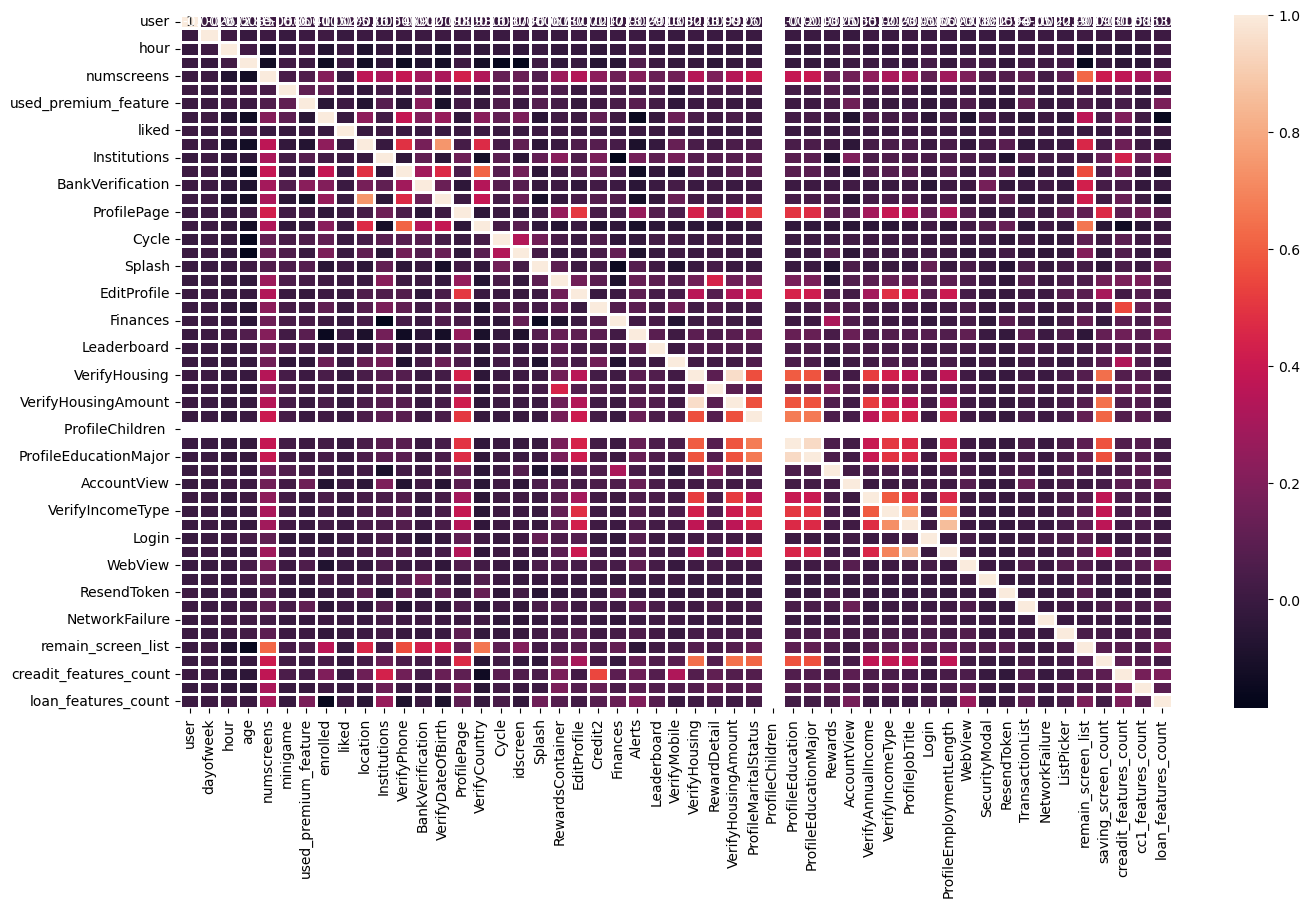

In [412]:
#heatmap with correlation matrix of  fin_ttech_appdata
plt.figure(figsize=(16,9))
sns.heatmap(fin_tech_appdata.corr(),annot=True,linewidths=2)

In [339]:
fin_tech_appdata.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'time_to_enrolled', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Credit2', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screen_count', 'creadit_features_count', 'cc1_features_count',
       'loan_features_count'],
      dtype='object

In [52]:
# profile childrenn of uniqe value
fin_tech_appdata['ProfileChildren '].unique()

array([0])

In [53]:
corr_matrix=fin_tech_appdata.corr()
fin_tech_appdata['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

In [54]:
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Credit2                   NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards   

In [55]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

data_processing

split data set in train and test

In [56]:
clean_fin_tech_appdata=fin_tech_appdata
target=fin_tech_appdata['enrolled']
fin_tech_appdata.drop(columns=['enrolled'],inplace=True)

In [57]:
#import train test split
from sklearn.model_selection import train_test_split


In [58]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   liked                    50000 non-null  int64
 8   location                 50000 non-null  int32
 9   Institutions             50000 non-null  int32
 10  VerifyPhone              50000 non-null  int32
 11  BankVerification         50000 non-null  int32
 12  VerifyDateOfBirth        50000 non-null  int32
 13  ProfilePage              50000 non-null  int32
 14  VerifyCountry            50000 non-null  int32
 15  Cy

In [59]:
# split the daata x and y
x_train,x_test,y_train,y_test=train_test_split(fin_tech_appdata,target,test_size=0.2,random_state=0)

In [60]:
# check the shape
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",x_test.shape)

shape of x_train (40000, 50)
shape of x_test (10000, 50)
shape of y_train (40000,)
shape of y_test (10000, 50)


In [61]:
# take user id in another varriable
train_user_id=x_train['user']
x_train.drop(columns=['user'],inplace=True)
test_user_id=x_test['user']
x_test.drop(columns='user',inplace=True)

In [62]:
print("shape of x_train",x_train.shape)
print("shape of train_user_id",train_user_id.shape)

shape of x_train (40000, 49)
shape of train_user_id (40000,)


future scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()


In [65]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [66]:
fin_tech_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   liked                    50000 non-null  int64
 8   location                 50000 non-null  int32
 9   Institutions             50000 non-null  int32
 10  VerifyPhone              50000 non-null  int32
 11  BankVerification         50000 non-null  int32
 12  VerifyDateOfBirth        50000 non-null  int32
 13  ProfilePage              50000 non-null  int32
 14  VerifyCountry            50000 non-null  int32
 15  Cy

model_build

In [67]:
#impoer requiered package
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

decision tree

In [68]:
# decission tree classifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [70]:
# check accuracy
y_pred_dt=dt_model.predict(x_test)
accuracy_score(y_pred_dt,y_test)

0.7175

In [71]:
dt_model_sc=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [72]:
dt_model_sc.fit(x_train_sc,y_train)
y_pred_dt_sc=dt_model_sc.predict(x_test_sc)
accuracy_score(y_pred_dt_sc,y_test)

0.7169

K_NN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
KNN_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN_model.fit(x_train,y_train)
KNN_model_dt=KNN_model.predict(x_test)
accuracy_score(y_test,KNN_model_dt)

0.6927

In [76]:
KNN_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN_model.fit(x_train_sc,y_train)
KNN_model_dt_sc=KNN_model.predict(x_test_sc)
accuracy_score(y_test,KNN_model_dt_sc)

0.7405

NAIVE BAYES

In [79]:
# import naive bayes
from sklearn.naive_bayes import GaussianNB

In [80]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_model_dt=nb_model.predict(x_test)
accuracy_score(y_test,nb_model_dt)

0.6969

In [82]:
nb_model_sc=GaussianNB()
nb_model_sc.fit(x_train_sc,y_train)
nb_model_dt_sc=nb_model_sc.predict(x_test_sc)
accuracy_score(y_test,nb_model_dt_sc)

0.6971

random forest

from 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model=RandomForestClassifier()

In [86]:
rf_model.fit(x_train,y_train)
rf_model_pr=rf_model.predict(x_test)
accuracy_score(y_test,rf_model_pr)

0.7759

In [87]:
rf_model_sc=RandomForestClassifier()
rf_model_sc.fit(x_train,y_train)
rf_model_pr_sc=rf_model_sc.predict(x_test)
accuracy_score(y_test,rf_model_pr_sc)

0.7783

LOGISTICS_REGRESSIONN

In [94]:
from sklearn.linear_model import LogisticRegression

In [98]:
lg_model=LogisticRegression(random_state=0)

In [99]:
lg_model.fit(x_train,y_train)
lg_model_pr=lg_model.predict(x_test)
accuracy_score(lg_model_pr,y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7482

In [101]:
lg_model_sc=LogisticRegression(random_state=0)
lg_model_sc.fit(x_train_sc,y_train)
lg_model_pr_sc=lg_model_sc.predict(x_test)
accuracy_score(lg_model_pr_sc,y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7101

support_vector_machine

In [103]:
from sklearn.svm import SVC

In [107]:
# build svm
sv_model=SVC()
sv_model.fit(x_train,y_train)
sv_model_pr=sv_model.predict(x_test)
accuracy_score(sv_model_pr,y_test)

0.7447

In [108]:
sv_model_sc=SVC()
sv_model_sc.fit(x_train,y_train)
sv_model_pr_sc=sv_model_sc.predict(x_test)
accuracy_score(sv_model_pr_sc,y_test)

0.7447

XG_BOOST

In [134]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

classification report of ML model